In [15]:
from pyecharts import WordCloud
import pandas as pd
import re
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='c:\windows\Fonts\simsun.ttc')
plt.rcParams['font.sans-serif']=['SimHei']

# from pyecharts_snapshot import make_snapshot
prePath = "D:\\LocalCodeRepo\\WeChatHistoryTools\\out"
csvPaths = [
    "\\friends",
    "\\dormitory",
]

In [24]:
def generateWordCloud(fileName, csvPath, index):
    strinfo = re.compile("-.*")
    name = strinfo.sub("", fileName)
    data = pd.read_csv(prePath + csvPath + "\\" + fileName)
    word = [i[0] for i in data[["单词"]].values]
    value = [i[0] for i in data[["词频"]].values]
    wordCloud = WordCloud(width=2000, height=2000,title=name)
    wordCloud.add("词云", word, value, word_size_range=[30, 120],shape='diamond')
    os.makedirs(".\\html\\" + str(index) + "\\词云\\", exist_ok=True)
    wordCloud.render(".\\html\\" + str(index) + "\\词云\\" + name + ".html")


## 生成词云

In [25]:
idx = 0
for csvPath in csvPaths:
    csvLists = os.listdir(prePath + csvPath)
    idx = idx + 1
    for csvFile in csvLists:
        if (".csv" not in csvFile):
            continue
        generateWordCloud(csvFile, csvPath, idx)

## 时间分布图

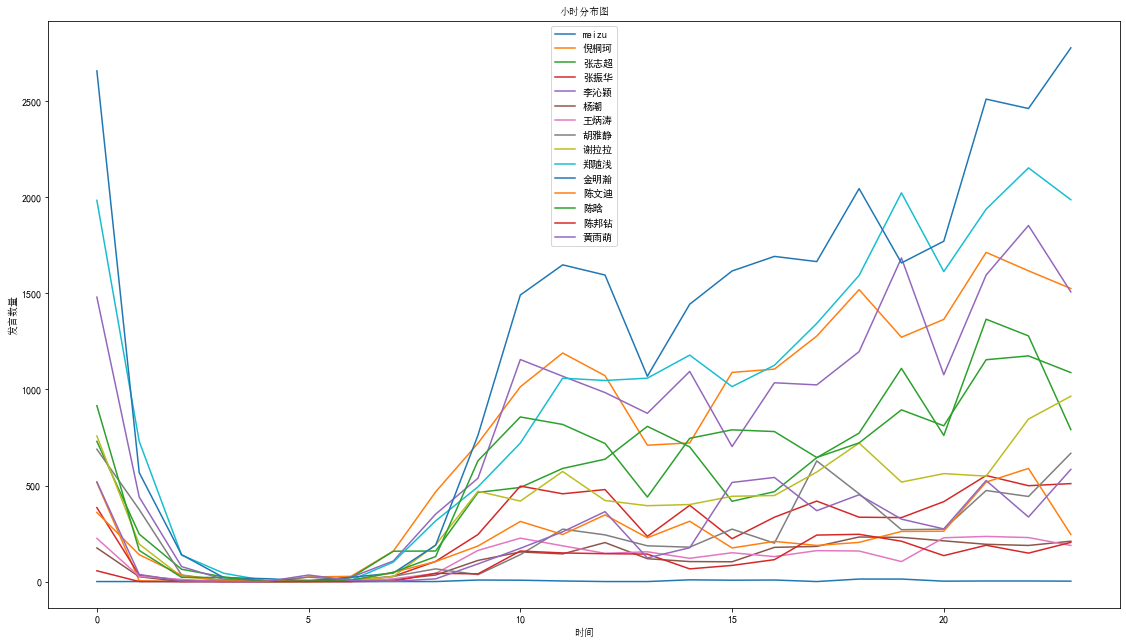

In [107]:
dayCSVLists = os.listdir(prePath + "\\friends\\day")
plt.figure(figsize=(19.2, 10.8))
for dayFile in dayCSVLists:
    if (".csv" not in dayFile):
        continue
    strinfo = re.compile("-.*")
    name = strinfo.sub("", dayFile)
    data = pd.read_csv(prePath + "\\friends\\day\\" + dayFile)
    x = [i[0] for i in data[["hour"]].values]
    y = [i[0] for i in data[["count"]].values]
    plt.plot(x, y,label=name)
plt.xlabel('时间',fontproperties=font)
plt.ylabel('发言数量',fontproperties=font)
plt.title("小时分布图",fontproperties=font)
os.makedirs(prePath + "\\friends\\day\\images\\" , exist_ok=True)
plt.savefig(prePath + "\\friends\\day\\images\\" + "小时分布图" + ".png")
plt.legend()
plt.show()

## 月份匹配分布图

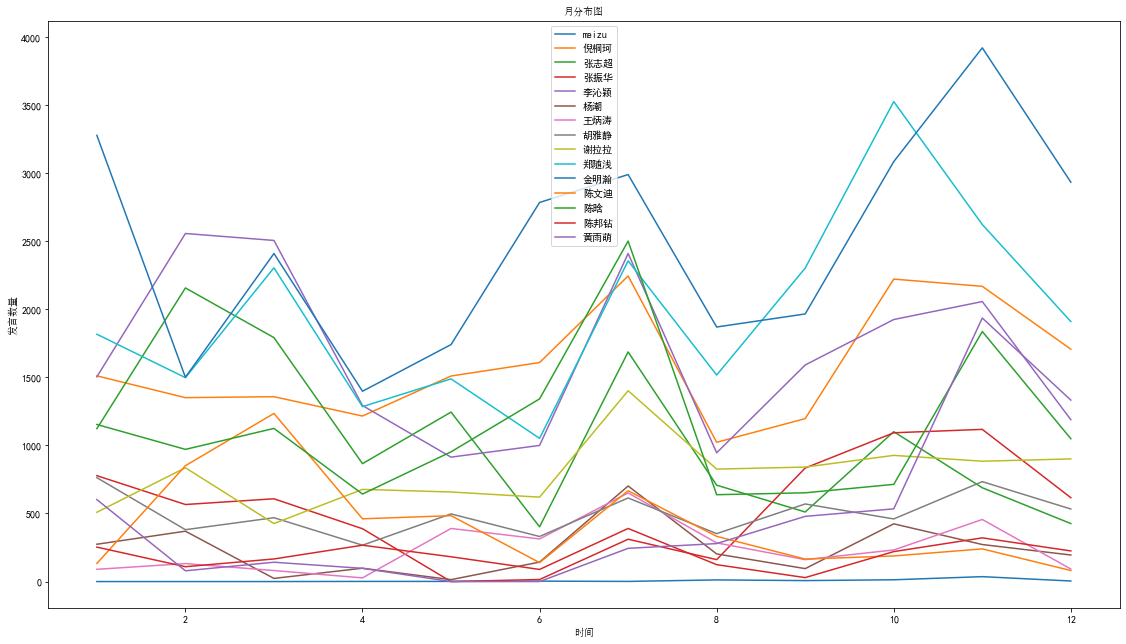

In [108]:
dayCSVLists = os.listdir(prePath + "\\friends\\month")
plt.figure(figsize=(19.2, 10.8))
for dayFile in dayCSVLists:
    if (".csv" not in dayFile):
        continue
    strinfo = re.compile("-.*")
    name = strinfo.sub("", dayFile)
    data = pd.read_csv(prePath + "\\friends\\month\\" + dayFile)
    x = [i[0] for i in data[["month"]].values]
    y = [i[0] for i in data[["count"]].values]
    plt.plot(x, y,label=name)
plt.xlabel('时间',fontproperties=font)
plt.ylabel('发言数量',fontproperties=font)
plt.title("月分布图",fontproperties=font)
os.makedirs(prePath + "\\friends\\month\\images\\" , exist_ok=True)
plt.savefig(prePath + "\\friends\\month\\images\\" + "月分布图" + ".png")
plt.legend()
plt.show()

## 关键字匹配分布图

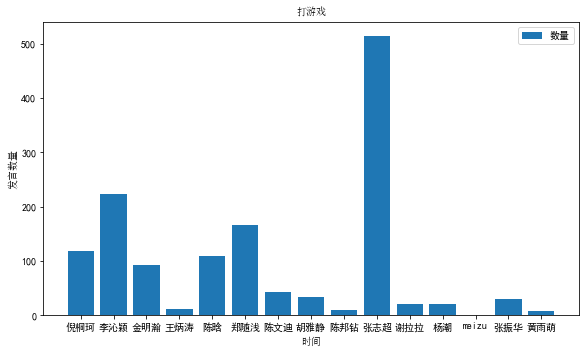

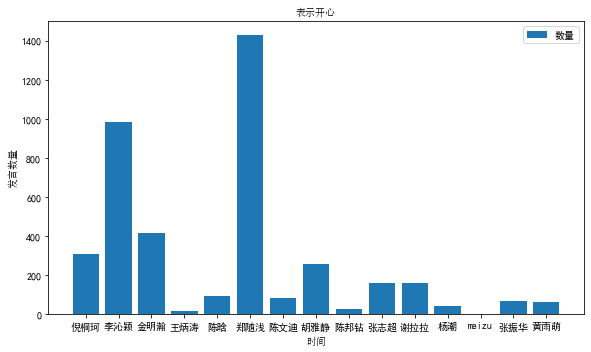

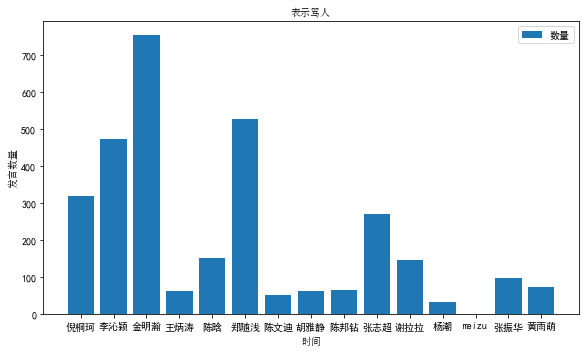

In [109]:
dayCSVLists = os.listdir(prePath + "\\friends\\division")
for dayFile in dayCSVLists:
    if (".csv" not in dayFile):
        continue
    plt.figure(figsize=(9.6, 5.4))
    name = dayFile.replace(".csv","")
    data = pd.read_csv(prePath + "\\friends\\division\\" + dayFile)
    x = [i[0] for i in data[["name"]].values]
    y = [i[0] for i in data[["count"]].values]
    plt.bar(x, y,label='数量')
    plt.xlabel('时间',fontproperties=font)
    plt.ylabel('发言数量',fontproperties=font)
    plt.title(name,fontproperties=font)
    os.makedirs(prePath + "\\friends\\division\\images\\" , exist_ok=True)
    plt.savefig(prePath + "\\friends\\division\\images\\" + name + ".png")
    plt.legend()
    plt.show()